In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np

From '2018-02-05' to '2022-02-04', there are 1009 data entries.


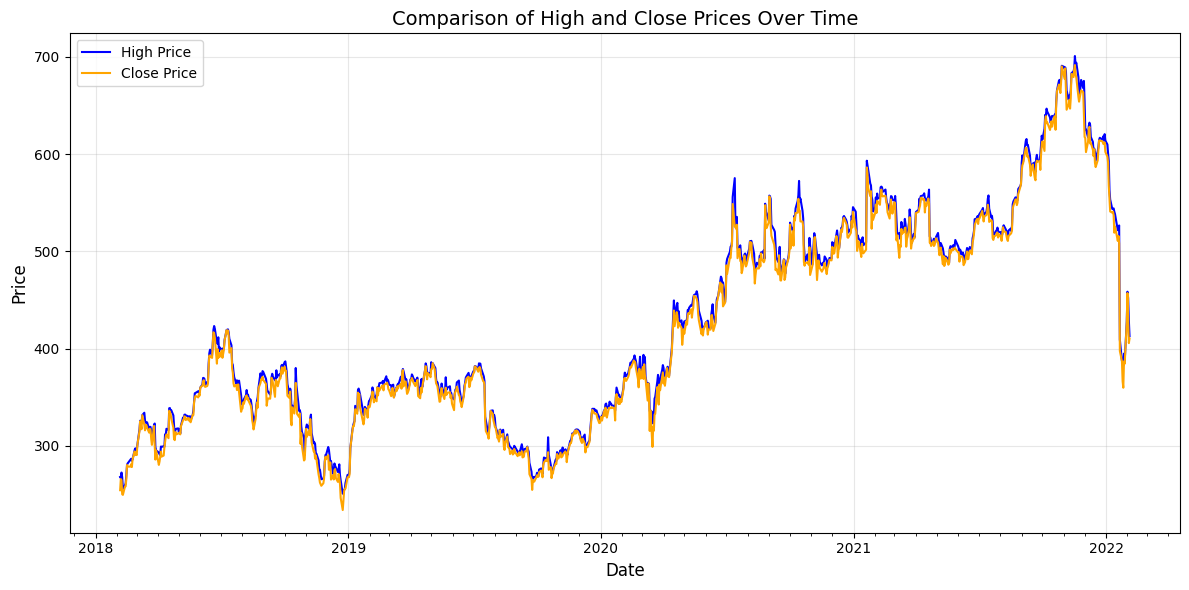

In [26]:

file_path = 'Dataset/NFLX.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

numeric_columns = ['High', 'Close']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


start_date = data['Date'].min()
end_date = data['Date'].max()
total_samples = len(data)
result = f"From '{start_date.strftime('%Y-%m-%d')}' to '{end_date.strftime('%Y-%m-%d')}', there are {total_samples} data entries."
print(result)


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['High'], label='High Price', color='blue', linewidth=1.5)
plt.plot(data['Date'], data['Close'], label='Close Price', color='orange', linewidth=1.5)


plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  


plt.title('Comparison of High and Close Prices Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

In [27]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() > 0:
    print(f"\nThere are missing values in the dataset. Total missing values: {missing_values.sum()}")
else:
    print("\nNo missing values in the dataset.")


invalid_rows_1 = data[(data['High'] < data['Close']) | (data['Close'] < data['Low'])]
invalid_rows_2 = data[(data['High'] < data['Open']) | (data['Open'] < data['Low'])]
invalid_rows = pd.concat([invalid_rows_1, invalid_rows_2]).drop_duplicates()

print(f"Rows that do not satisfy 'High >= Close >= Low' or 'High >= Open >= Low':")
print(invalid_rows)


Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values in the dataset.
Rows that do not satisfy 'High >= Close >= Low' or 'High >= Open >= Low':
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [28]:
#Create derived features
input_file_path = 'Dataset/NFLX.csv' 
output_file_path = 'Dataset/Processed_NFLX.csv'

data = pd.read_csv(input_file_path)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# SMA:
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# EMA: 
data['EMA_5'] = data['Close'].ewm(span=5, adjust=False).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

#Price Range: 
data['Price_Range'] = data['High'] - data['Low']

#RSI:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data)

data = data.dropna()

data.to_csv(output_file_path, index=False)

start_date = data['Date'].min()
end_date = data['Date'].max()
total_samples = len(data)
result = f"From '{start_date.strftime('%Y-%m-%d')}' to '{end_date.strftime('%Y-%m-%d')}', there are {total_samples} data entries."
print(result)

missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() > 0:
    print(f"\nThere are missing values in the dataset. Total missing values: {missing_values.sum()}")
else:
    print("\nNo missing values in the dataset.")


print(data.head())
print(data.info())

data = data.apply(pd.to_numeric, errors="coerce")
print(f"After converting to numeric: {data.shape}")

data.dropna(inplace=True)
print(f"After dropping NaNs: {data.shape}")



From '2018-03-05' to '2022-02-04', there are 990 data entries.
Missing values per column:
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
SMA_5          0
SMA_10         0
SMA_20         0
EMA_5          0
EMA_10         0
EMA_20         0
Price_Range    0
RSI_14         0
dtype: int64

No missing values in the dataset.
         Date        Open        High         Low       Close   Adj Close  \
19 2018-03-05  302.850006  316.910004  297.600006  315.000000  315.000000   
20 2018-03-06  319.880005  325.790009  316.500000  325.220001  325.220001   
21 2018-03-07  320.000000  323.739990  314.549988  321.160004  321.160004   
22 2018-03-08  322.200012  322.920013  314.130005  317.000000  317.000000   
23 2018-03-09  321.329987  331.440002  320.230011  331.440002  331.440002   

      Volume       SMA_5      SMA_10      SMA_20       EMA_5      EMA_10  \
19  18986100  297.685999  290.625000  276.568499  300.301673  291.92

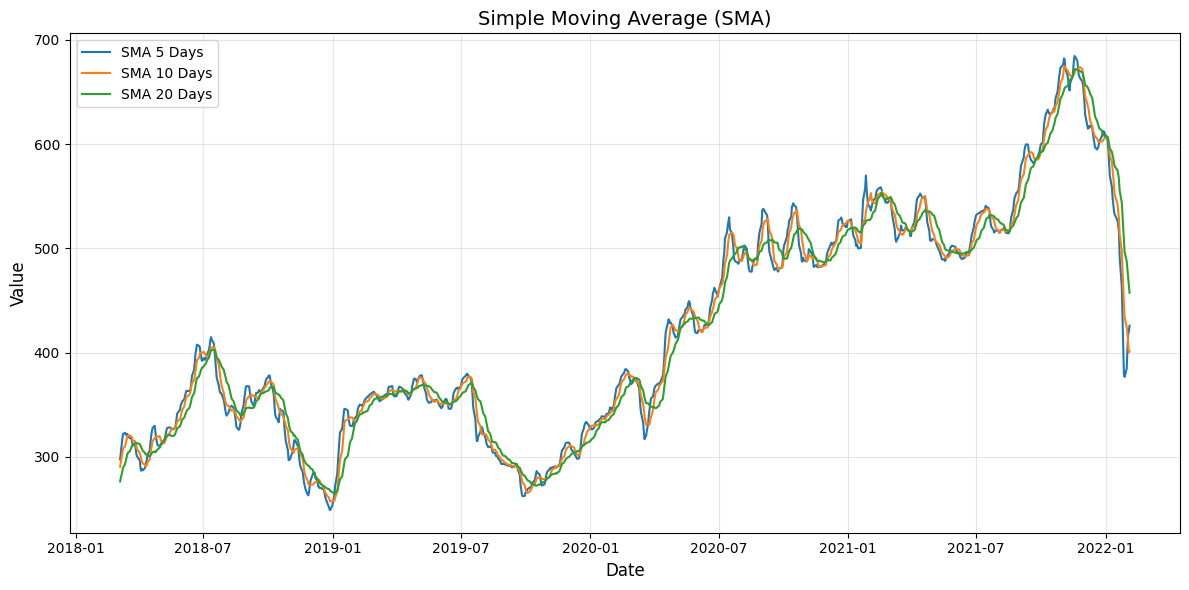

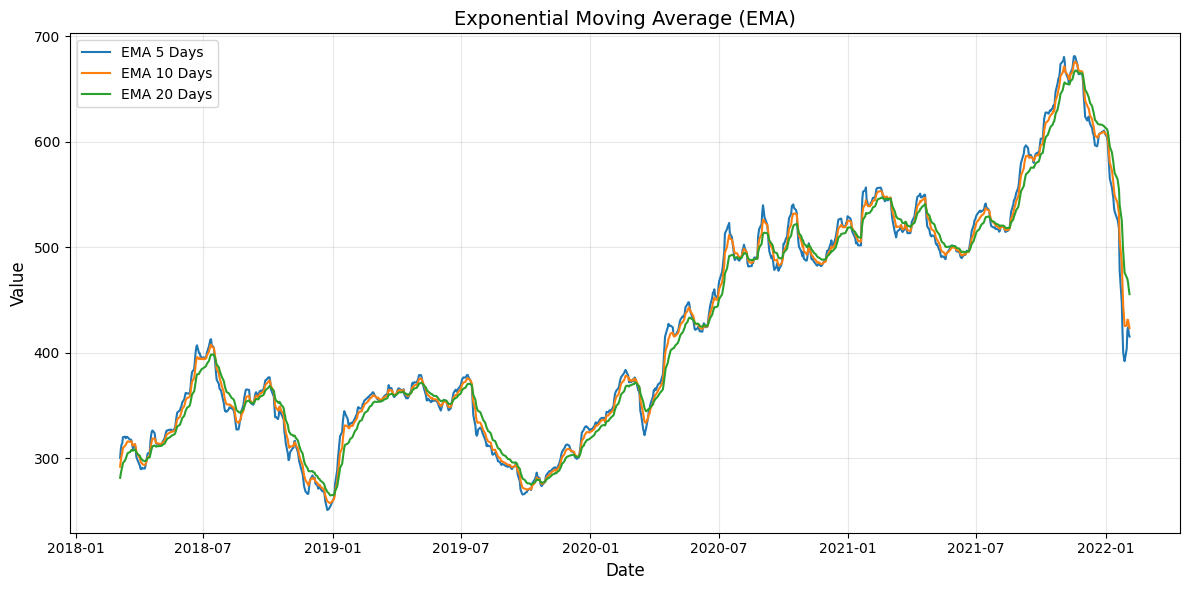

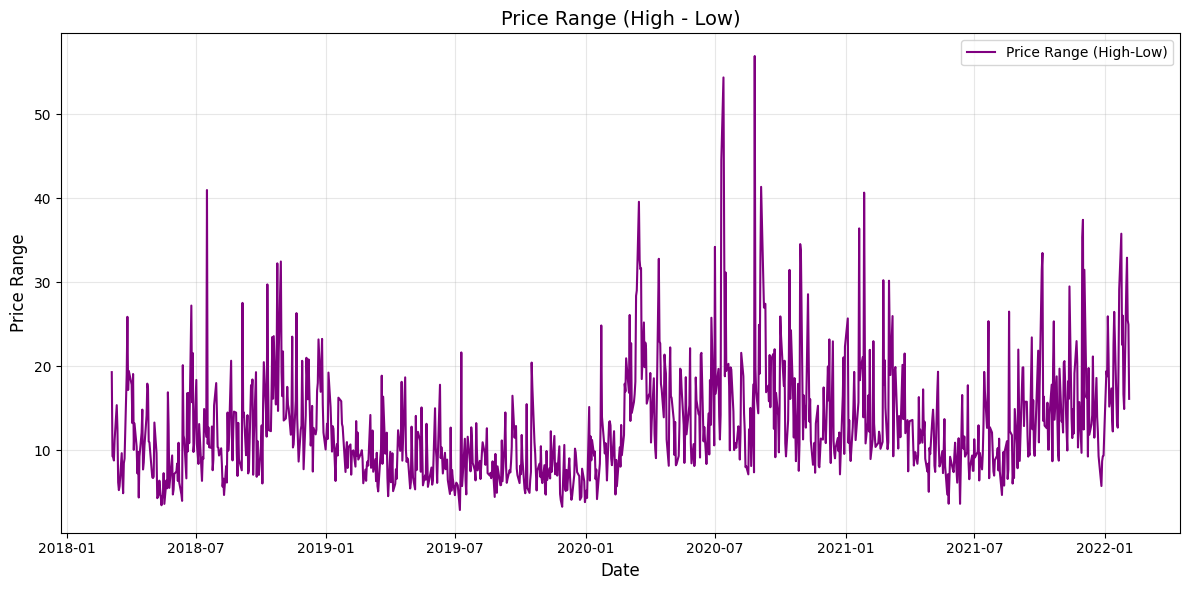

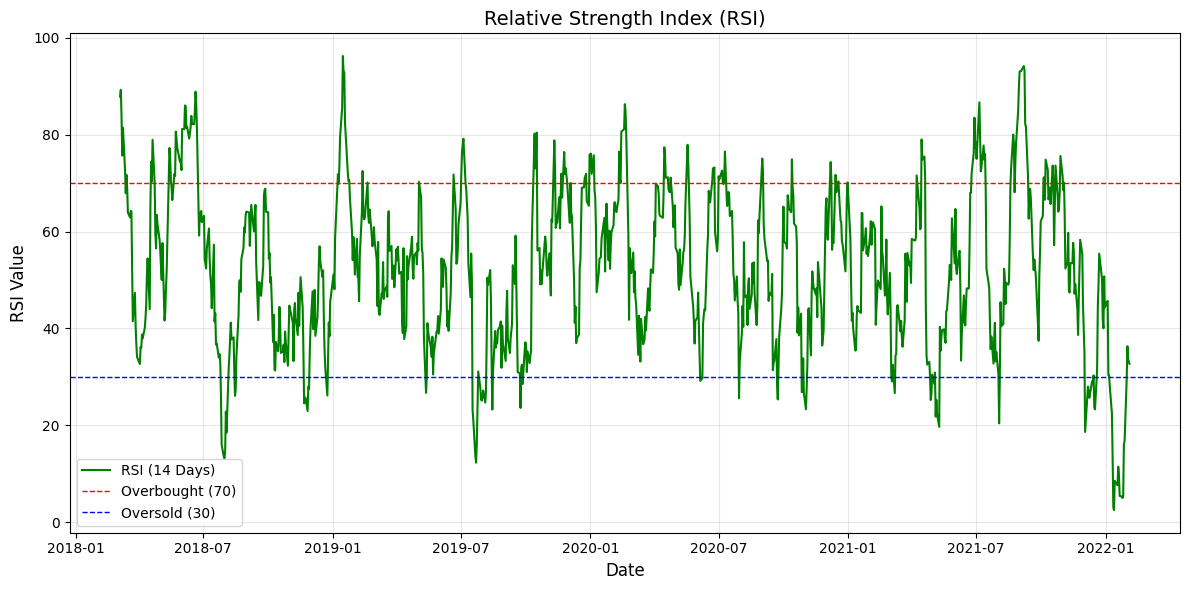

In [29]:
file_path = 'Dataset/Processed_NFLX.csv'  
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# SMA: 5-day, 10-day, 20-day
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['SMA_5'], label='SMA 5 Days', linewidth=1.5)
plt.plot(data['Date'], data['SMA_10'], label='SMA 10 Days', linewidth=1.5)
plt.plot(data['Date'], data['SMA_20'], label='SMA 20 Days', linewidth=1.5)
plt.title('Simple Moving Average (SMA)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# EMA: 5-day, 10-day, 20-day
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['EMA_5'], label='EMA 5 Days', linewidth=1.5)
plt.plot(data['Date'], data['EMA_10'], label='EMA 10 Days', linewidth=1.5)
plt.plot(data['Date'], data['EMA_20'], label='EMA 20 Days', linewidth=1.5)
plt.title('Exponential Moving Average (EMA)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Price Range
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price_Range'], label='Price Range (High-Low)', color='purple', linewidth=1.5)
plt.title('Price Range (High - Low)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Range', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RSI
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['RSI_14'], label='RSI (14 Days)', color='green', linewidth=1.5)
plt.title('Relative Strength Index (RSI)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI Value', fontsize=12)
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', linewidth=1, label='Oversold (30)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()